# Вводная часть

Бизнес - крупный интернет-магазин. Есть 2 блока задач.   

**Часть 1**   
Есть подготовленный список гипотез, которые необходимо приоритизировать, используя фреймворки ICE и RICE.   

**Часть 2**  
Проведен A/B тест. Необходимо проанализировать результаты и принять решение о дальнейших действиях.

## Часть 1. Приоритизация гипотез.

Есть подготовленный список гипотез, которые необходимо приоритизировать, используя фреймворки ICE и RICE. 

### Описание данных

Файл с данными - `/datasets/hypothesis.csv`

`Hypothesis` — краткое описание гипотезы;   
`Reach` — охват пользователей по 10-балльной шкале;   
`Impact` — влияние на пользователей по 10-балльной шкале;   
`Confidence` — уверенность в гипотезе по 10-балльной шкале;   
`Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.
### Основная часть

In [1]:
# импортирую необходимые библиотеки для обеих частей работы
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

In [2]:
# загружаю датасет и знакомлюсь с данными
hypo = pd.read_csv('hypothesis.csv')
pd.set_option('display.max_colwidth', None) # чтобы весь текст гипотезы помещался
pd.set_option('display.float_format', '{:.2f}'.format) # округление значений до 2 знаков после запятой
display(hypo)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Можно исправить опечатки в формулировках гипотез и привести названия столбцов в `lower case`, но критичности в этом в моем кейсе нет, т.к. мало работы с ними.

---
Есть 8 проскоренных по разным параметрам гипотез. Осталось их приоритизировать.
#### Приоритизация по ICE фреймворку

In [3]:
# добавляю столбец со значениями ICE
hypo['ICE'] = (
    hypo['Impact'] * hypo['Confidence'] / hypo['Efforts']
)
display(hypo[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Топ-3 гипотезы:
- акция на скидку в день рождения
- подключить два новых канала привлечения
- добавление формы подписки для сбора базы клиентов для email рассылок

Посмотрю как изменится приоритет у гипотез, применив другой фреймворк.
#### Приоритизация по RICE фреймворку

In [4]:
# добавляю столбец со значениями RICE
hypo['RICE'] = (
    hypo['Reach'] * hypo['Impact'] * hypo['Confidence'] / hypo['Efforts']
)
display(hypo[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.00


Видно что топ гипотез изменился:
- на первое место пришла гипотеза с формой подписки
- добавились гипотезы с баннерами на главной и блоками рекомендаций для увеличения конверсии
- из топа ушла гипотеза с акцией на скидку в день рождения

Это изменение связано с учетом охвата аудитории при приоритизации гипотез: гипотезы с бОльшим охватом вышли в топ.

#### Вывод
- Список гипотез был приоритизирован с помощью двух фреймворков - ICE и RICE.
- Существуют различия в приоритетах проверки гипотез в зависимости от используемого фреймворка, связанные с учетом охвата аудитории.
- При использовании любого фреймворка в топе есть гипотезы формы подписки для сбора базы данных клиентов для рассылок и подключении двух новых каналов привлечения.
Начать проверку, считаю, нужно именно с гипотез, которые и с учетом охвата и без него есть в топе. Дополнительно большой охват несколько упростит проведение A/B теста.

## Часть 2. Анализ A/B теста.

Проведен A/B тест. Необходимо проанализировать результаты и принять решение о дальнейших действиях.

### Описание данных

Файлы с данными: `/datasets/orders.csv` - заказы, `/datasets/visitors.csv` - посетители.

**Заказы**   
`transactionId` — идентификатор заказа;   
`visitorId` — идентификатор пользователя, совершившего заказ;   
`date` — дата, когда был совершён заказ;   
`revenue` — выручка заказа;   
`group` — группа A/B-теста, в которую попал заказ.   

**Посетители**   
`date` — дата;   
`group` — группа A/B-теста;   
`visitors` — количество пользователей в указанную дату в указанной группе A/B-теста.   

### Основная часть

In [5]:
# загружаю датасеты для работы
orders = pd.read_csv('orders.csv')
visitors = pd.read_csv('visitors.csv')

In [6]:
for i in [orders, visitors]:
    display(i.head())
    display(i.info())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

Пустых значений нет, нужно привести столбцы с датами в формат datetime.

In [7]:
# приведу столбцы с датой к формату datetime
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [8]:
orders.info()
print()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


#### Кумулятивная выручка по группам
Сперва подготовлю датафрейм для анализа кумулятивных значений.

In [9]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

In [10]:
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [11]:
# кумулятивная выручка по группам
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date', 'revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date', 'revenue', 'orders']]

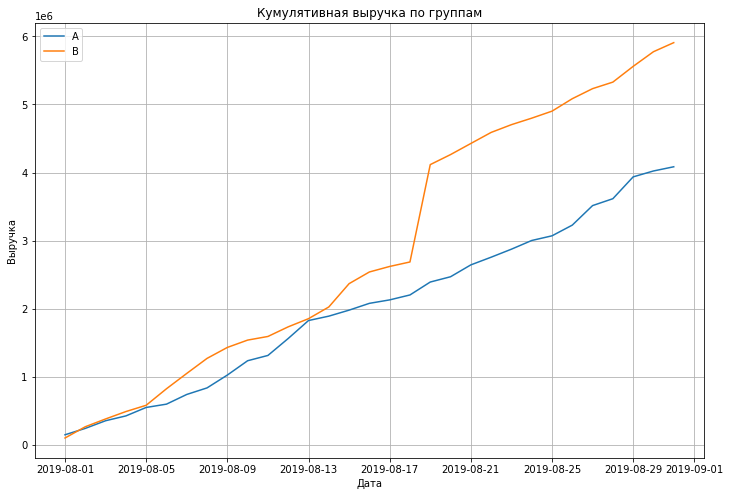

In [12]:
plt.figure(figsize=(12, 8))
plt.grid(True)
plt.title('Кумулятивная выручка по группам')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend()
plt.show()

Средняя выручка обеих групп показывает стабильный плавный рост, это хорошо. Но 18 августа произошел скачок выручке в группе В и далее снова плавный рост. Вероятно, этот скачок связан с выбросом. Посмотрю позднее.

#### Кумулятивный средний чек по группам

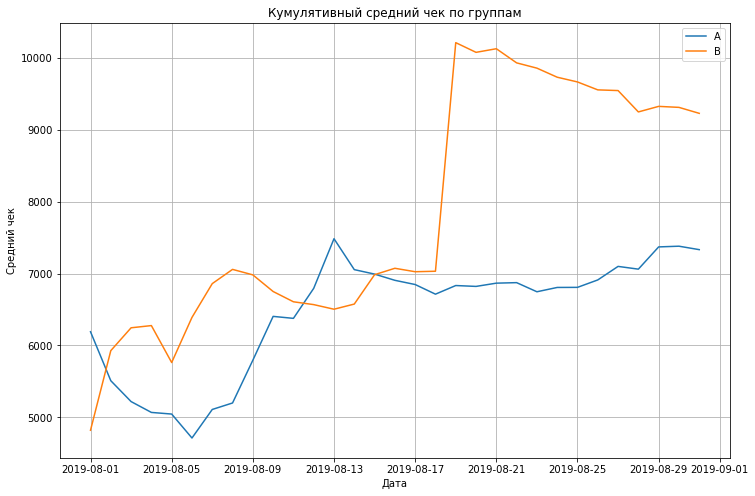

In [13]:
plt.figure(figsize=(12, 8))
plt.grid(True)
plt.title('Кумулятивный средний чек по группам')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.legend()
plt.show()

На графике виден тот же скачок в группе В перед тем как графики нормализовались. Дополнительно есть падение среднего чека после этого всплеска в группе B, в то время когда средний чек группы А показывает небольшой рост.   
Посмотрю на график относительного изменения кумулятивного среднего чека.

In [14]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

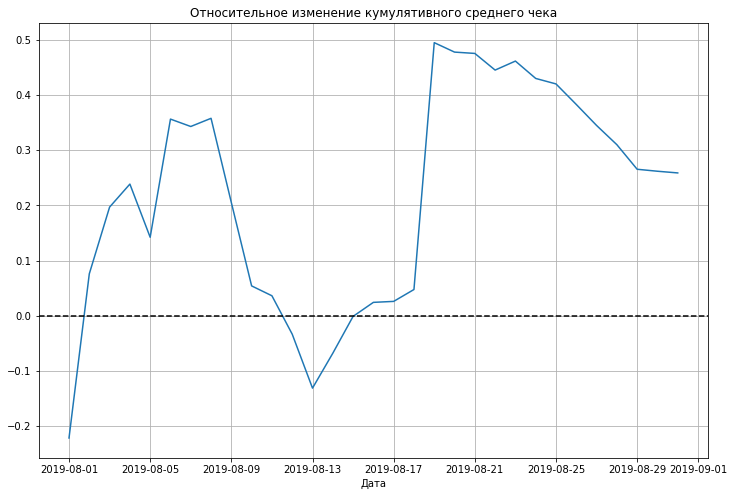

In [15]:
plt.figure(figsize=(12, 8))
plt.grid(True)
plt.title('Относительное изменение кумулятивного среднего чека')
plt.plot(
    mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1
)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Дата')
plt.show()

Видно сильные скачки между сегментами в нескольких точках. Все сильнее крепнет убеждение во влиянии выбросов.   
Посмотрю на кумулятивную конверсию.

#### Кумулятивная конверсия по группам

In [16]:
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

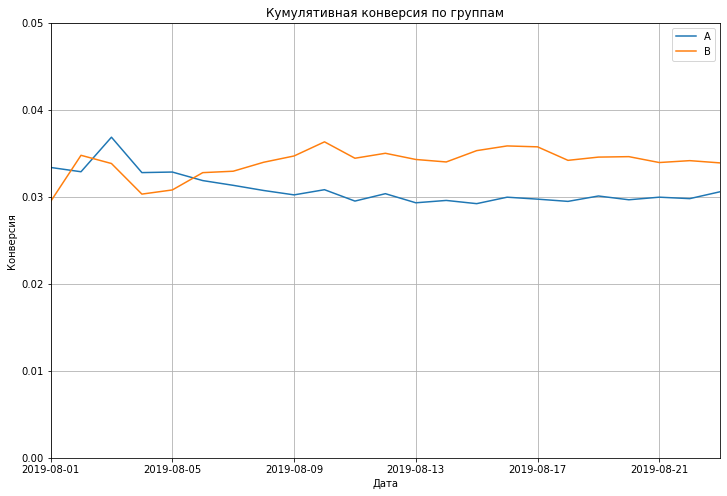

In [17]:
plt.figure(figsize=(12, 8))
plt.grid(True)
plt.title('Кумулятивная конверсия по группам')
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 23), 0, 0.05]) #задам масштаб
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.show()

Сперва конверсии шли одинаково, но с 6 августа конверсии разошлись и стабилизировались 9 августа. При этом конверсия группы В выше. Надо посмотреть на график относительного изменения конверсий.

In [18]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

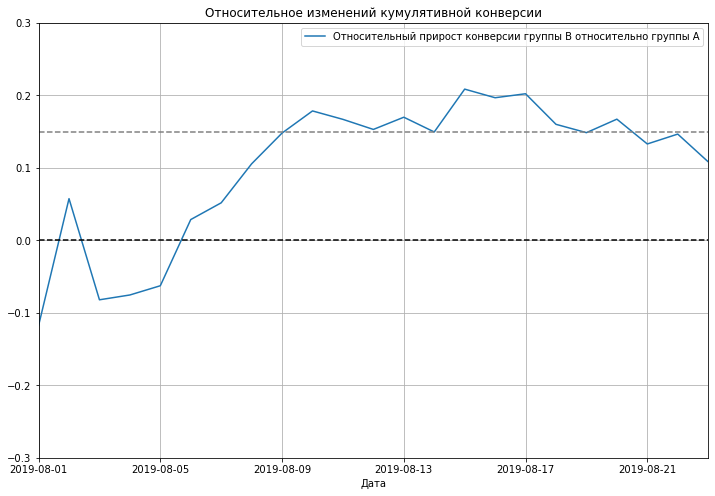

In [19]:
plt.figure(figsize=(12, 8))
plt.grid(True)
plt.title('Относительное изменений кумулятивной конверсии')
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 23), -0.3, 0.3]) #задам масштаб
plt.xlabel('Дата')
plt.show()

Почти с самого начала теста группа В лидирует по конверсии, но показывает то рост, то падение.

#### Количество заказов по пользователям

In [20]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['visitorId', 'orders']

95 перцентиль равен: 2.0
99 перцентиль равен: 4.0


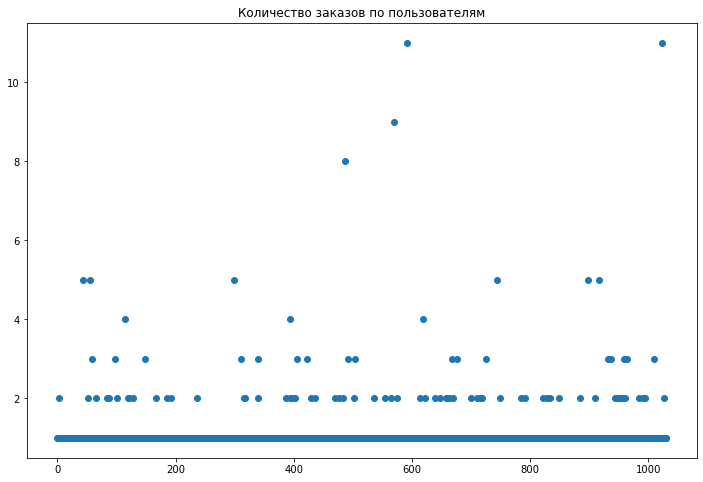

In [21]:
x_values = pd.Series(range(0, len(ordersByUsers)))

plt.figure(figsize=(12, 8))
plt.title('Количество заказов по пользователям')
plt.scatter(x_values, ordersByUsers['orders'])

print('95 перцентиль равен:', np.percentile(ordersByUsers['orders'], 95))
print('99 перцентиль равен:', np.percentile(ordersByUsers['orders'], 99))

- 5% клиентов совершили более 2 заказов и 1% более 4
- границей для определения аномальных пользователей будет 2 заказа, т.е. 5% отсеку.

#### Стоимости заказов

95 перцентиль равен: 28000
99 перцентиль равен: 58233


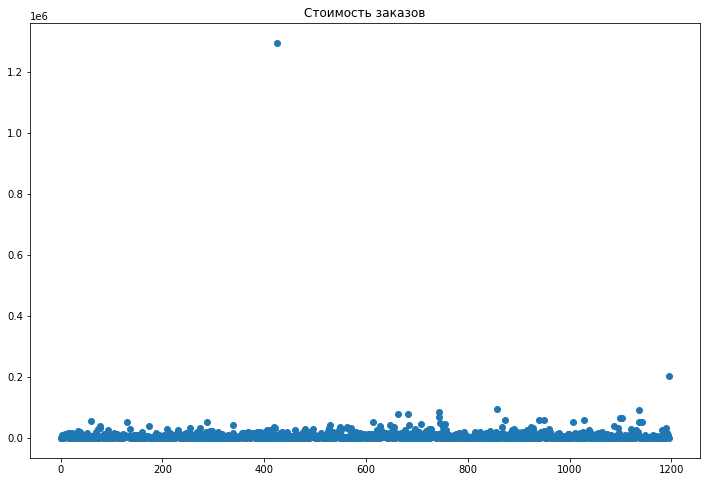

In [22]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.figure(figsize=(12, 8))
plt.title('Стоимость заказов')
plt.scatter(x_values, orders['revenue'])

print('95 перцентиль равен:', round(np.percentile(orders['revenue'], 95)))
print('99 перцентиль равен:', round(np.percentile(orders['revenue'], 99)))

Вот и выброс нашел. Да какой мощный. Границей будет 28000 - стоимость заказа для 95% клиентов.

#### Статистическая значимость различий по "сырым" данным
##### Средний чек
Гипотезы:   
**Нулевая** - различий в среднем чеке между группами нет.   
**Альтернативная** - различия в среднем чеке между группами есть.   
Буду применять критерий Манна-Уитни для определения статистической значимости, чтобы не учитывать сами значения из-за наличия выбросов.

In [23]:
print('p-value равен:', '{:.2f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительные различия в среднем чеке:','{:.2f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value равен: 0.73
Относительные различия в среднем чеке: 0.26


Нулевую гипотезу отвергнуть не удалось, p-value сильно больше 0.05. Статистической значимости нет.

##### Конверсия
Гипотезы:   
**Нулевая** - различий в конверсии между группами нет.   
**Альтернативная** - различия в конверсии между группами есть. 
Подготовлю фрейм

In [24]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

data = visitorsADaily.merge(visitorsBDaily, left_on='date', right_on='date', how='left')

In [25]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p-value равен:', '{:.2f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('Относительные различия в конверсии:','{:.2f}'.format(sampleB.mean() / sampleA.mean() - 1))

p-value равен: 0.02
Относительные различия в конверсии: 0.14


Отвергаем нулевую гипотезу.

#### Статистическая значимость различий по очищенным данным
##### Средний чек
Гипотезы:   
**Нулевая** - различий в среднем чеке между группами нет.   
**Альтернативная** - различия в среднем чеке между группами есть.   

Очищу данные от выбросов.

In [26]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders'] 

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > (np.percentile(ordersByUsers['orders'], 95))]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > (np.percentile(ordersByUsers['orders'], 95))]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > (round(np.percentile(orders['revenue'], 95)))]['visitorId']

abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.shape[0])

74


74 клиента делали много заказов или же слишком дорогие.

In [27]:
print(
    'p-value равен:', '{:.2f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    'Относительные различия в среднем чеке:', "{:.2f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value равен: 0.74
Относительные различия в среднем чеке: -0.02


p-value больше 0.05 - нулевую гипотезу отвергнуть не удалось. Статистической значимости нет.

##### Конверсия
Гипотезы:   
**Нулевая** - различий в конверсии между группами нет.   
**Альтернативная** - различия в конверсии между группами есть.   
Исправлю датафрейм.

In [28]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

buyersADaily = (
    orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitorId'].isin(abnormalUsers)))][['date', 'transactionId', 'visitorId']]
    .groupby('date', as_index=False)
    .agg({'visitorId': pd.Series.nunique})
)
buyersADaily.columns = ['date', 'buyersPerDateA']

buyersBDaily = (
    orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitorId'].isin(abnormalUsers)))][['date', 'transactionId', 'visitorId']]
    .groupby('date', as_index=False)
    .agg({'visitorId': pd.Series.nunique})
)
buyersBDaily.columns = ['date', 'buyersPerDateB']

data = (
    buyersADaily.merge(
        buyersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
)

data['conversionA'] = data['buyersPerDateA'] / data['visitorsPerDateA']
data['conversionB'] = data['buyersPerDateB'] / data['visitorsPerDateB']

data.head()

,date,buyersPerDateA,buyersPerDateB,visitorsPerDateA,visitorsPerDateB,conversionA,conversionB
0,2019-08-01,15,19,719,713,0.02,0.03
1,2019-08-02,18,20,619,581,0.03,0.03
2,2019-08-03,24,16,507,509,0.05,0.03
3,2019-08-04,13,14,717,770,0.02,0.02
4,2019-08-05,25,21,756,707,0.03,0.03


In [29]:
print('p-value равен:', '{:.2f}'.format(stats.mannwhitneyu(data['conversionA'], data['conversionB'])[1]))
print('Относительные различия в конверсии:','{:.2f}'.format(data['conversionB'].mean()/data['conversionA'].mean()-1))

p-value равен: 0.03
Относительные различия в конверсии: 0.19


Отвергаем нулевую гипотезу. Достигнут уровень статистической значимости.   

--
#### Результаты А/В теста
- По средним чекам между группами А и В нет статистической значимости различий как по сырым данным, так и по очищенным.
- В конверссии между группами А и В есть статистическая значимость различий по очищенным данным.


### Вывод

**Сперва приоритизировали гипотезы отдела маркетинга.**   

- Список гипотез был приоритизирован с помощью двух фреймворков - ICE и RICE.
- Существуют различия в приоритетах проверки гипотез в зависимости от используемого фреймворка, связанные с учетом охвата аудитории.
- При использовании любого фреймворка в топе есть гипотезы формы подписки для сбора базы данных клиентов для рассылок и подключении двух новых каналов привлечения. Начать проверку, считаю, нужно именно с гипотез, которые и с учетом охвата и без него есть в топе. Дополнительно большой охват несколько упростит проведение A/B теста.

**Проведен анализ А/В теста**   

- Разницы в среднем чеке тест не выявил.
- Не удалось отвергнуть гипотезу об отсутствии разницы в конверсии групп ни по "сырым" ни по очищенным данным.

Тест можно остановить и считать успешным. Видно, что конверсия группы В выше.